# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
dataset = pd.read_csv("Retail_Transactions_Dataset.csv")
dataset.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah baris dan kolom dalam dataset: (1000000, 13)

Tipe data pada setiap kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Date               1000000 non-null  object 
 2   Customer_Name      1000000 non-null  object 
 3   Product            1000000 non-null  object 
 4   Total_Items        1000000 non-null  int64  
 5   Total_Cost         1000000 non-null  float64
 6   Payment_Method     1000000 non-null  object 
 7   City               1000000 non-null  object 
 8   Store_Type         1000000 non-null  object 
 9   Discount_Applied   1000000 non-null  bool   
 10  Customer_Category  1000000 non-null  object 
 11  Season             1000000 non-null  object 
 12  Promotion          666057 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory 

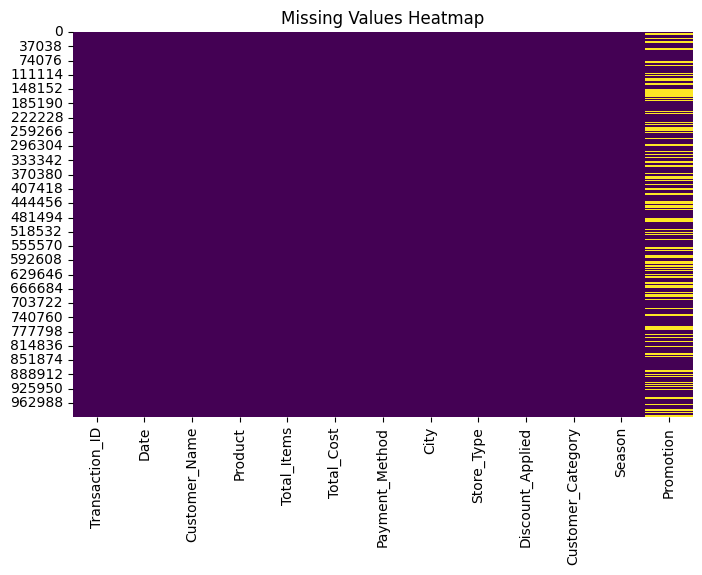

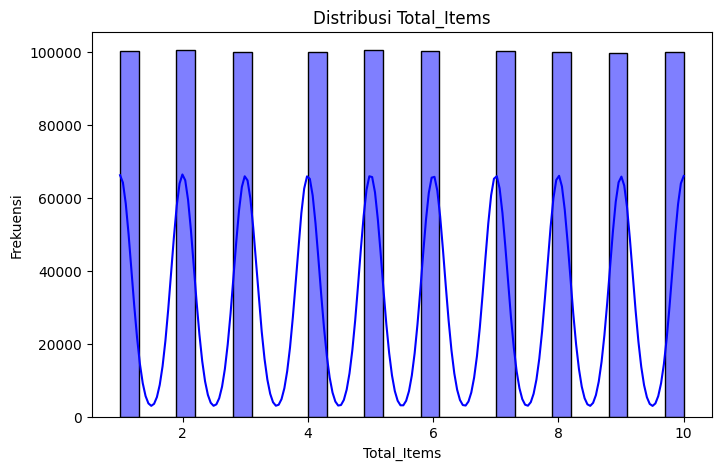

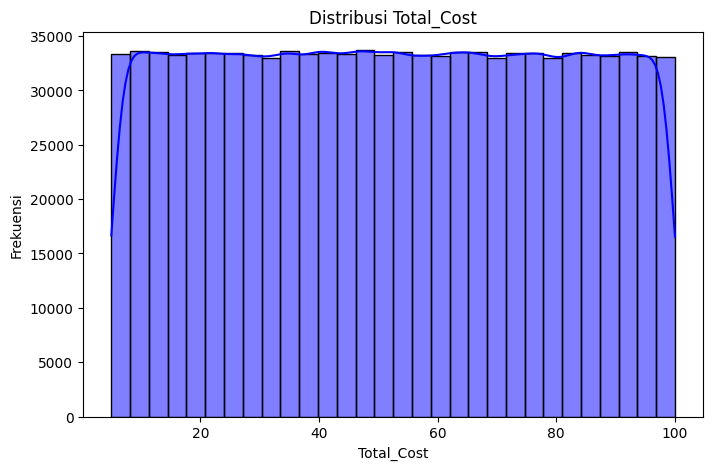

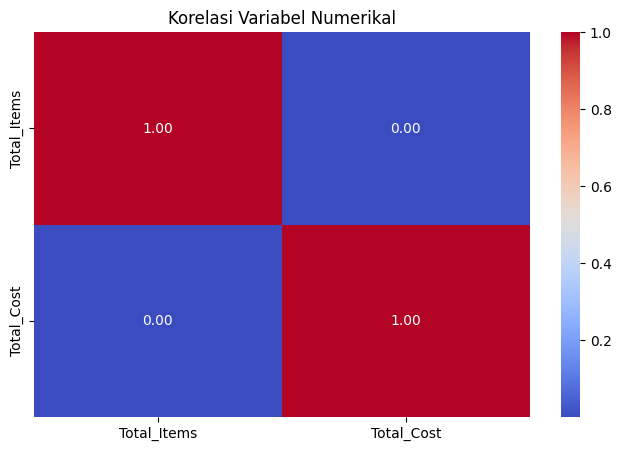

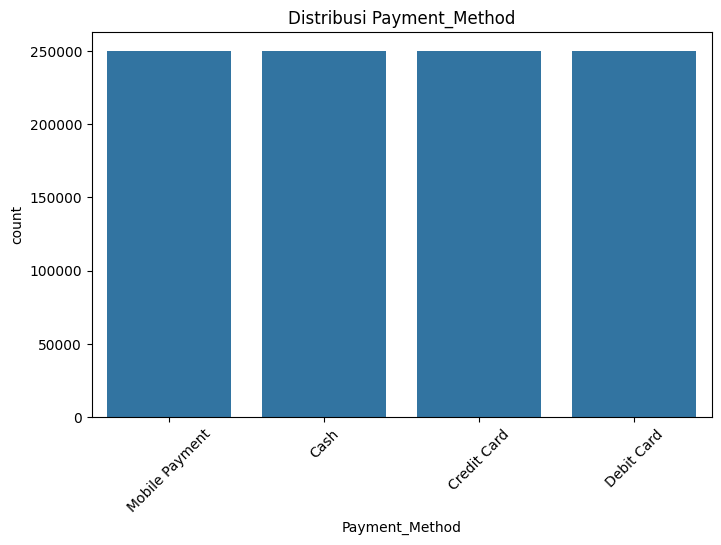

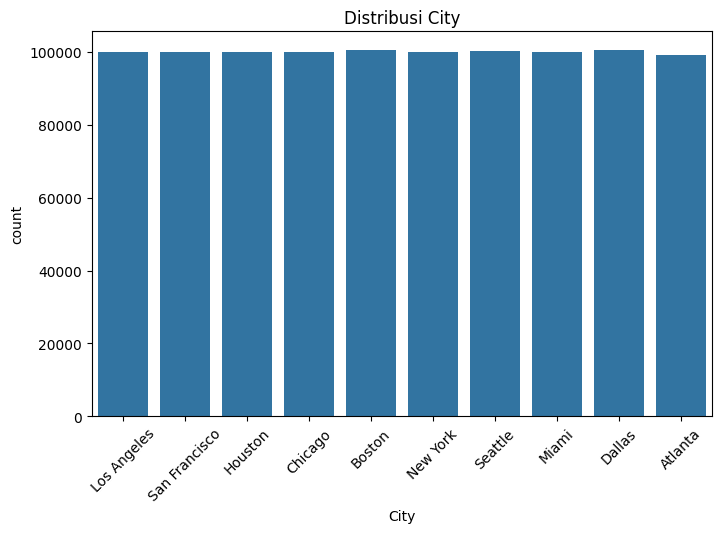

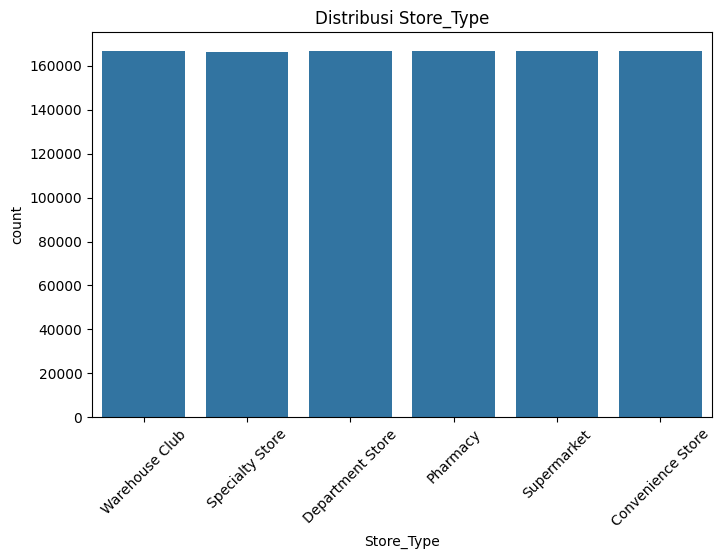

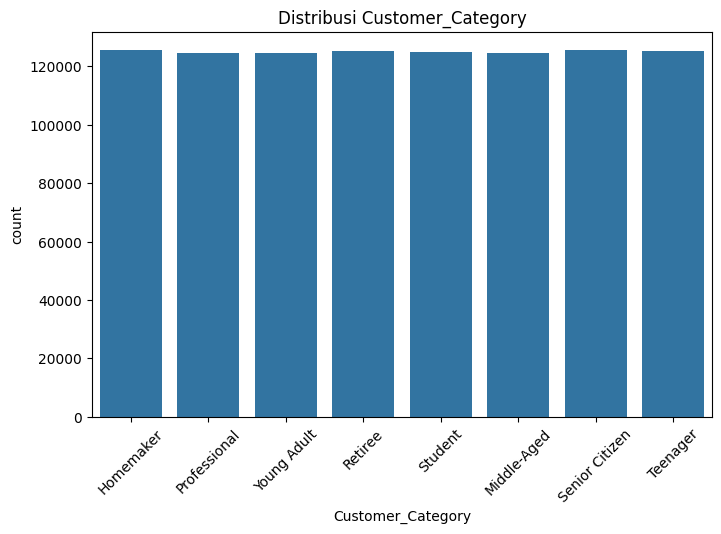

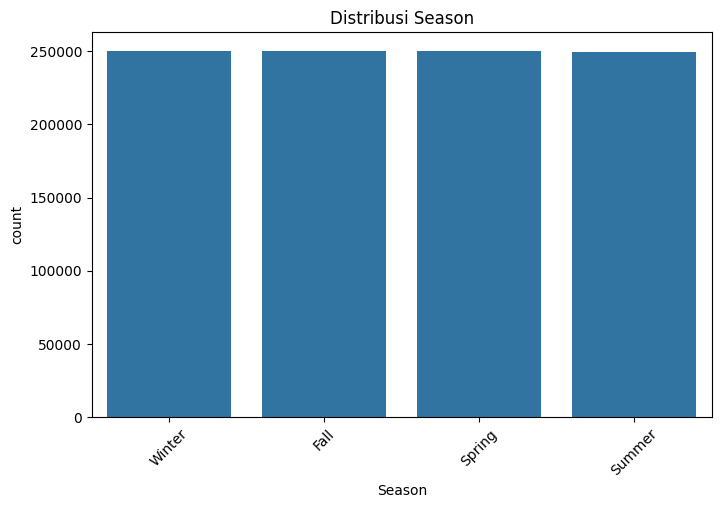

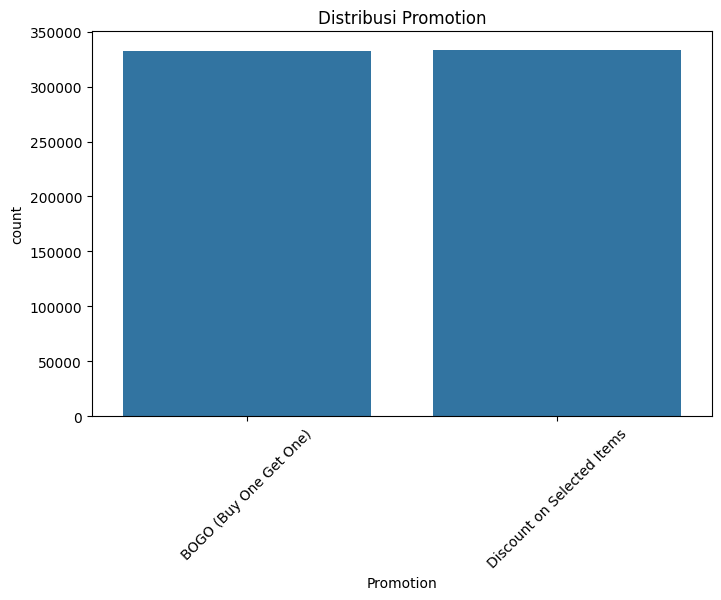

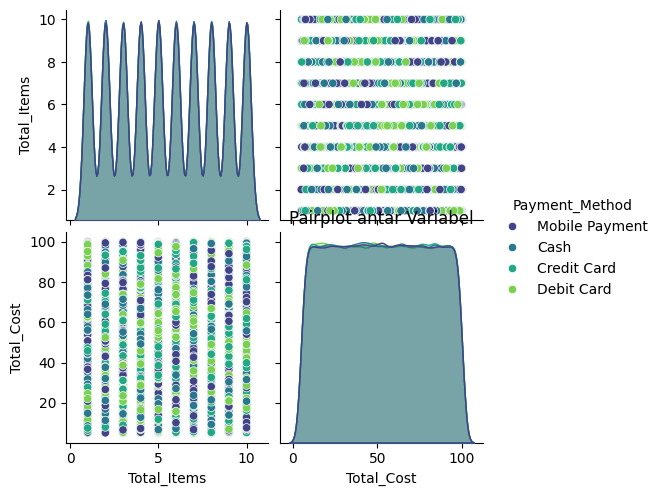

In [3]:
# Informasi dataset
print("Jumlah baris dan kolom dalam dataset:", dataset.shape)
print("\nTipe data pada setiap kolom:")
print(dataset.info())

# Cek nilai yang hilang
print("\nJumlah nilai yang hilang di setiap kolom:")
print(dataset.isnull().sum())

# Visualisasi missing values
plt.figure(figsize=(8, 5))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Variabel numerikal
numerical_cols = ['Total_Items', 'Total_Cost']

# Distribusi data numerikal
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(dataset[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

# Korelasi antar variabel numerikal
plt.figure(figsize=(8, 5))
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Variabel Numerikal")
plt.show()

# Variabel kategorikal
categorical_cols = ['Payment_Method', 'City', 'Store_Type', 'Customer_Category', 'Season', 'Promotion']

# Visualisasi distribusi data kategorikal
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=dataset, x=col)
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
    plt.show()

# Pairplot antar variabel numerikal
sns.pairplot(dataset, vars=numerical_cols, hue="Payment_Method", palette="viridis")
plt.title("Pairplot antar Variabel")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Jumlah nilai kosong sebelum penanganan:
Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
dtype: int64

Jumlah nilai kosong setelah penanganan:
Transaction_ID       0
Date                 0
Customer_Name        0
Product              0
Total_Items          0
Total_Cost           0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
dtype: int64

Jumlah data sebelum menghapus duplikasi: 1000000
Jumlah data setelah menghapus duplikasi: 1000000


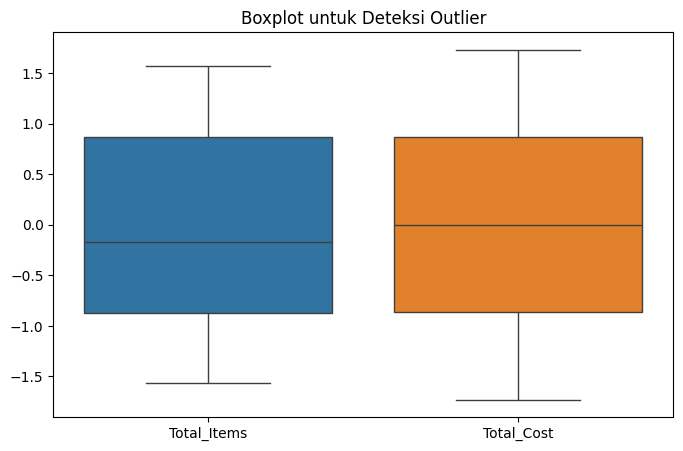


Jumlah data setelah menghapus outlier: 1000000

Contoh data setelah encoding:
   Transaction_ID                 Date      Customer_Name  \
0      1000000000  2022-01-21 06:27:29       Stacey Price   
1      1000000001  2023-03-01 13:01:21   Michelle Carlson   
2      1000000002  2024-03-21 15:37:04        Lisa Graves   
3      1000000003  2020-10-31 09:59:47  Mrs. Patricia May   
4      1000000004  2020-12-10 00:59:59     Susan Mitchell   

                                             Product  Total_Items  Total_Cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']    -0.869165    0.700106   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...    -1.217397   -0.967474   
2                                        ['Spinach']     0.175529   -0.399943   
3                             ['Tissues', 'Mustard']    -1.565628   -0.478361   
4                                      ['Dish Soap']     1.568455   -1.314340   

   Payment_Method  City  Store_Type  Discount_Applied  Customer_Cat

In [4]:
## Menangani Missing Values
print("Jumlah nilai kosong sebelum penanganan:")
print(dataset.isnull().sum())

# Isi missing values pada kolom 'Promotion' dengan kategori default
dataset['Promotion'] = dataset['Promotion'].fillna('No Promotion')

# Verifikasi kembali
print("\nJumlah nilai kosong setelah penanganan:")
print(dataset.isnull().sum())

## Menghapus Data Duplikat**
print("\nJumlah data sebelum menghapus duplikasi:", dataset.shape[0])
dataset = dataset.drop_duplicates()
print("Jumlah data setelah menghapus duplikasi:", dataset.shape[0])

## Normalisasi atau Standarisasi Fitur Numerikal
scaler = StandardScaler()

# Normalisasi 'Total_Items' dan 'Total_Cost'
dataset[['Total_Items', 'Total_Cost']] = scaler.fit_transform(dataset[['Total_Items', 'Total_Cost']])

## Deteksi dan Penanganan Outlier**
plt.figure(figsize=(8, 5))
sns.boxplot(data=dataset[['Total_Items', 'Total_Cost']])
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()

# Menghapus outlier berdasarkan z-score (-3 hingga 3)
dataset = dataset[(dataset['Total_Items'] > -3) & (dataset['Total_Items'] < 3)]
dataset = dataset[(dataset['Total_Cost'] > -3) & (dataset['Total_Cost'] < 3)]

print("\nJumlah data setelah menghapus outlier:", dataset.shape[0])

## Encoding Data Kategorikal
label_encoder = LabelEncoder()

# Encode kolom kategorikal
categorical_cols = ['Payment_Method', 'City', 'Store_Type', 'Customer_Category', 'Season', 'Promotion']
for col in categorical_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col])

print("\nContoh data setelah encoding:")
print(dataset.head())

## Binning (Pengelompokan Data)
bins = [-3, -1, 1, 3]
labels = ['Low', 'Medium', 'High']
dataset['Cost_Category'] = pd.cut(dataset['Total_Cost'], bins=bins, labels=labels)

print("\nContoh data setelah binning:")
print(dataset[['Total_Cost', 'Cost_Category']].head())

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

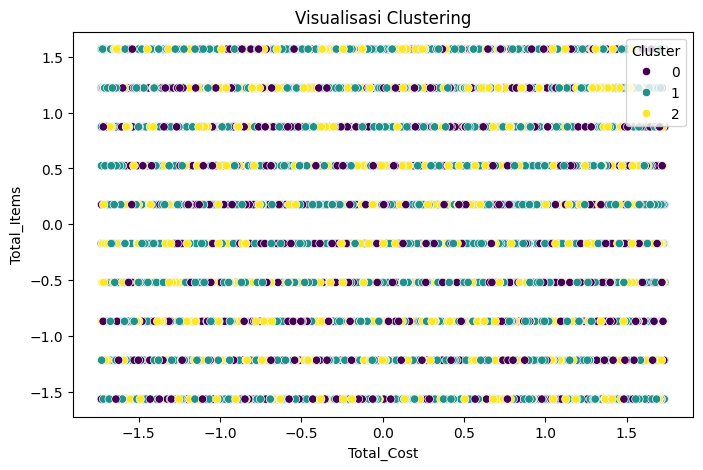

In [5]:
# Pembangunan model clustering dengan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Latih model dengan data clustering
clustering_features = ['Total_Items', 'Total_Cost', 'Payment_Method', 'City', 'Store_Type']
X_clustering = dataset[clustering_features]
kmeans.fit(X_clustering)

# Tambahkan hasil clustering ke dataset
dataset['Cluster'] = kmeans.labels_

# Visualisasi hasil clustering dengan optimasi
plt.figure(figsize=(8, 5))
sns.scatterplot(data=dataset, x='Total_Cost', y='Total_Items', hue='Cluster', palette='viridis', legend='full')
plt.title("Visualisasi Clustering")
plt.xlabel("Total_Cost")
plt.ylabel("Total_Items")
plt.legend(title='Cluster', loc='upper right')  # Atur lokasi legenda
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

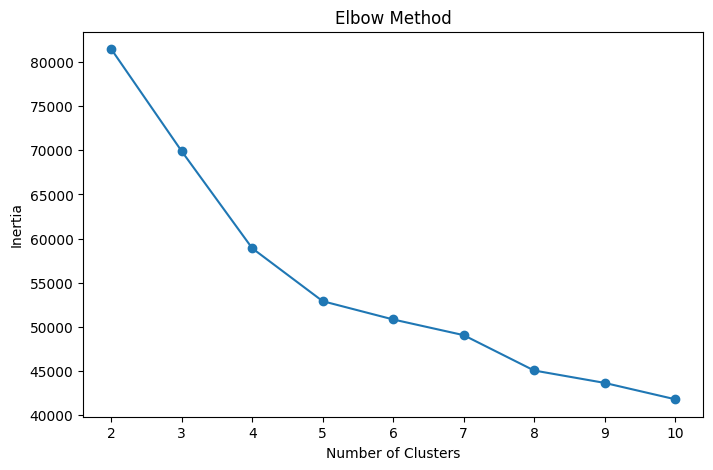

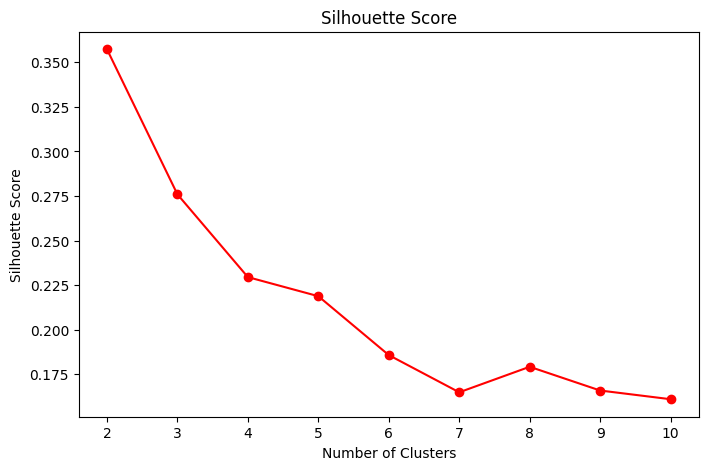

Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [6]:
# Atur jumlah thread untuk mencegah kebocoran memori
import os
os.environ["OMP_NUM_THREADS"] = "6" 

# Sampling data untuk mempercepat proses
sampled_data = X_clustering.sample(n=10000, random_state=42)

# Variabel untuk menyimpan hasil
inertia = []
silhouette_scores = []
k_values = range(2, 11)

# Iterasi untuk setiap jumlah cluster
for k in k_values:
    # Tingkatkan batch_size sesuai rekomendasi
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=3072)
    kmeans.fit(sampled_data)
    
    # Simpan inertia dan silhouette score
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(sampled_data, kmeans.labels_))

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='red')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Menampilkan jumlah cluster optimal
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_k}")


## **c. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

c:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


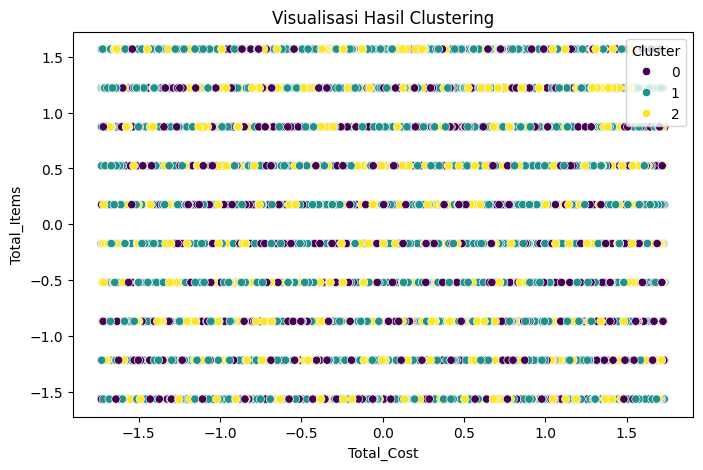

c:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


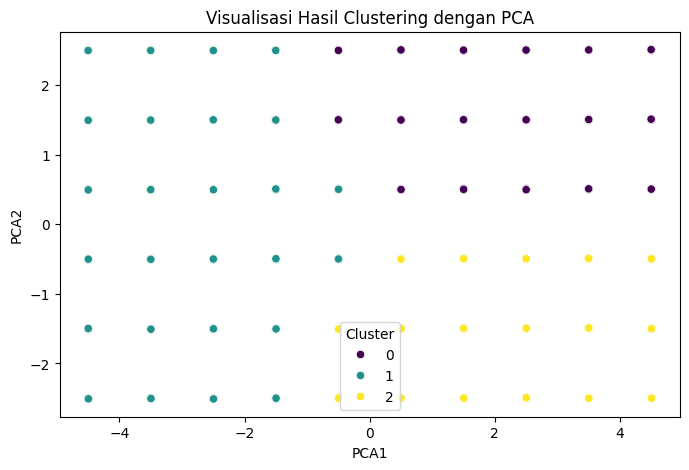

In [7]:
# Visualisasi hasil clustering dengan scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=dataset, x='Total_Cost', y='Total_Items', hue='Cluster', palette='viridis')
plt.title("Visualisasi Hasil Clustering")
plt.xlabel("Total_Cost")
plt.ylabel("Total_Items")
plt.legend(title='Cluster')
plt.show()

from sklearn.decomposition import PCA

# Lakukan reduksi dimensi dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering)

# Tambahkan hasil PCA ke dataset
dataset['PCA1'] = X_pca[:, 0]
dataset['PCA2'] = X_pca[:, 1]

# Visualisasi hasil clustering dengan PCA
plt.figure(figsize=(8, 5))
sns.scatterplot(data=dataset, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title='Cluster')
plt.show()


## **d. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?


Karakteristik rata-rata tiap cluster:
         Transaction_ID  Total_Items  Total_Cost      PCA1      PCA2
Cluster                                                             
0          1.000500e+09     0.001136    0.001939  2.145118  1.559749
1          1.000501e+09    -0.002400   -0.000336 -2.807516 -0.000372
2          1.000500e+09     0.002532   -0.001423  2.145596 -1.557872

Distribusi jumlah data per cluster:
Cluster
1    433154
2    283542
0    283304
Name: count, dtype: int64


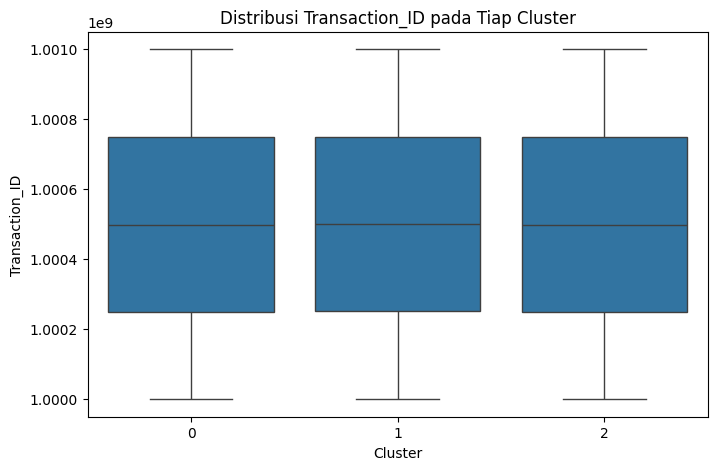

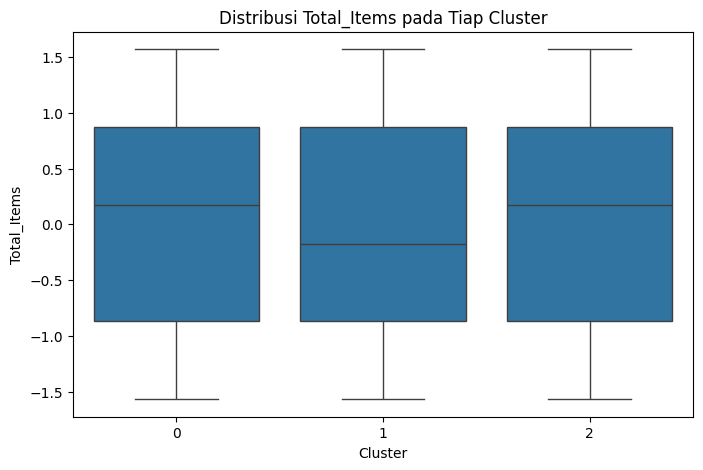

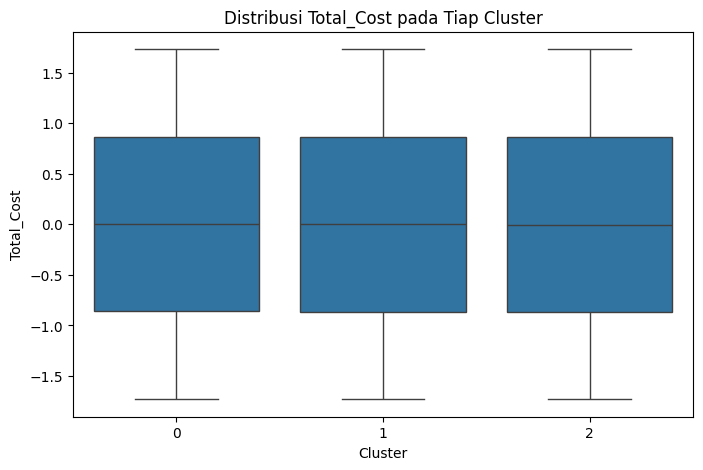

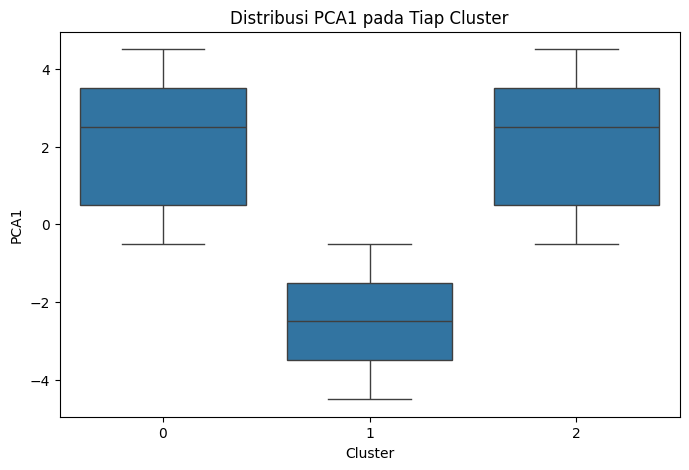

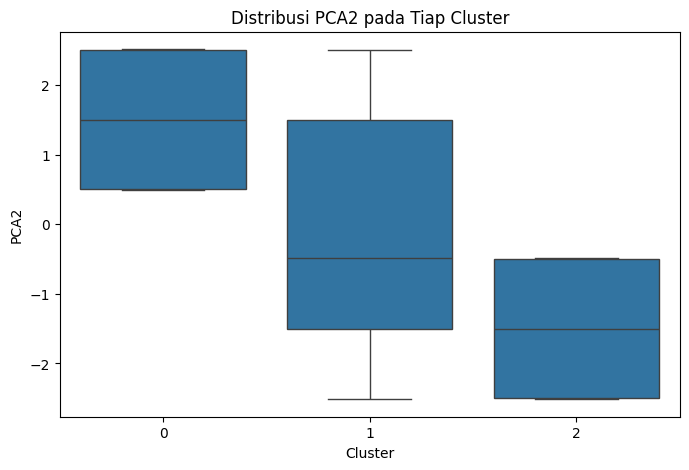

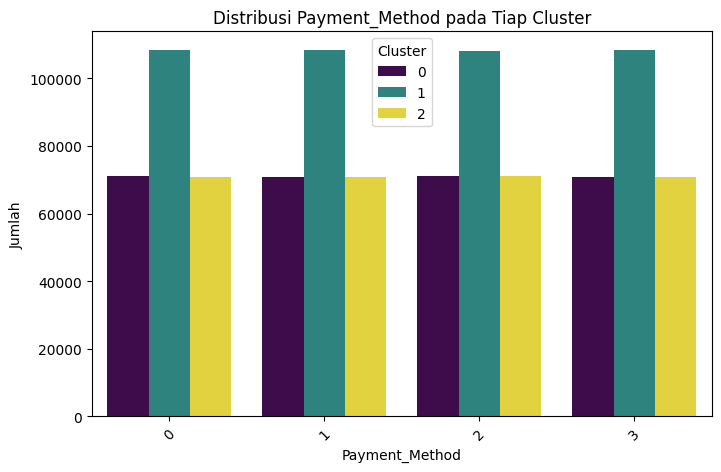

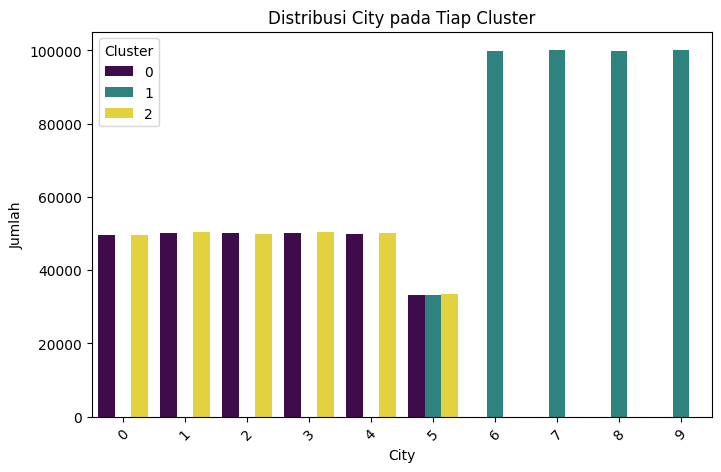

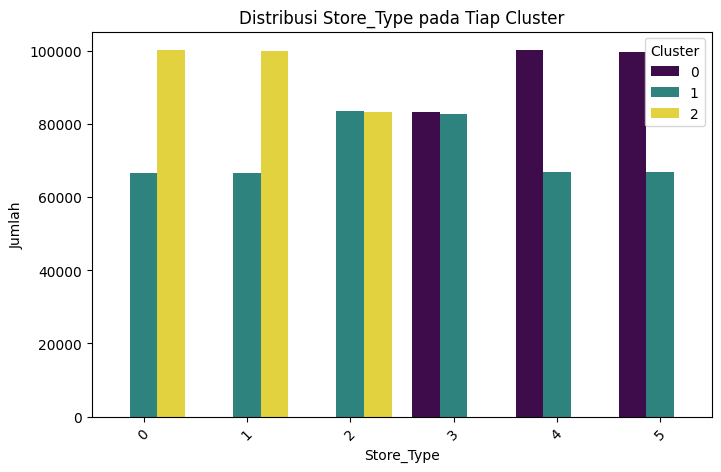

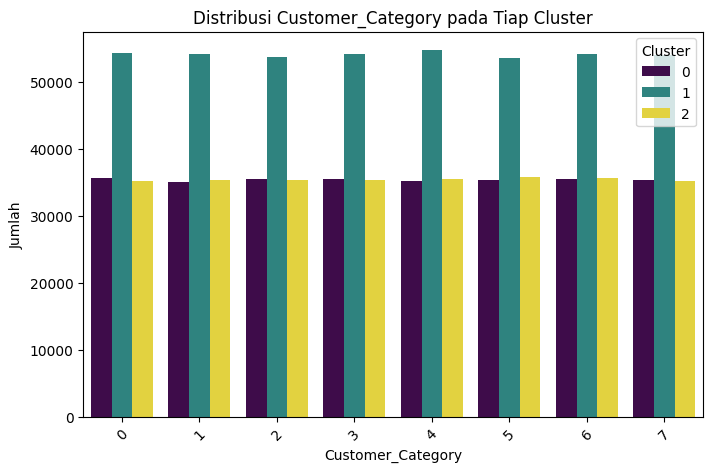

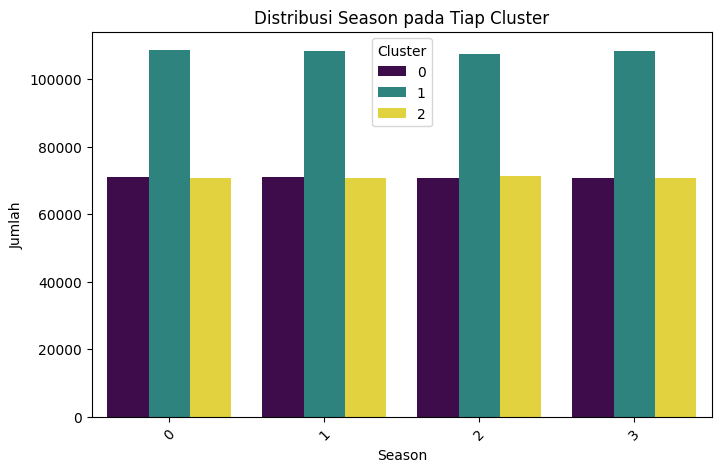

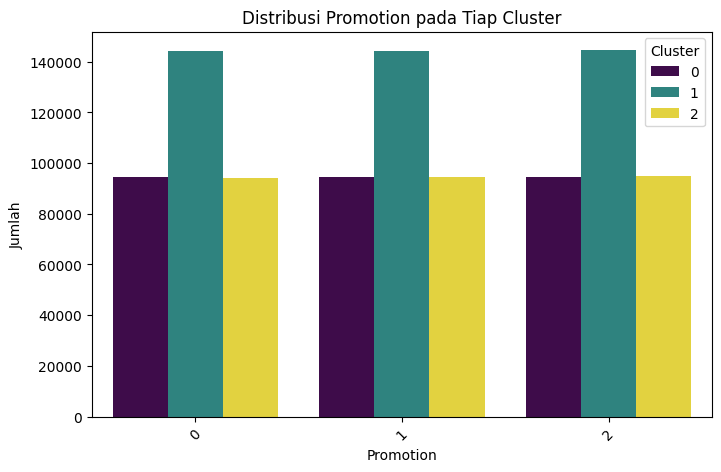

In [8]:
# Pilih hanya kolom numerikal untuk analisis cluster
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Analisis karakteristik tiap cluster berdasarkan kolom numerikal
cluster_summary = dataset.groupby('Cluster')[numerical_cols].mean()
print("\nKarakteristik rata-rata tiap cluster:")
print(cluster_summary)

# Distribusi jumlah data di setiap cluster
cluster_distribution = dataset['Cluster'].value_counts()
print("\nDistribusi jumlah data per cluster:")
print(cluster_distribution)

# Visualisasi distribusi data pada tiap cluster berdasarkan fitur numerikal
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=dataset, x='Cluster', y=col)
    plt.title(f"Distribusi {col} pada Tiap Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(col)
    plt.show()

# (Opsional) Analisis tambahan untuk fitur kategorikal
categorical_cols = ['Payment_Method', 'City', 'Store_Type', 'Customer_Category', 'Season', 'Promotion']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=dataset, x=col, hue='Cluster', palette='viridis')
    plt.title(f"Distribusi {col} pada Tiap Cluster")
    plt.xlabel(col)
    plt.ylabel("Jumlah")
    plt.legend(title="Cluster")
    plt.xticks(rotation=45)
    plt.show()


**Hasil interpretasi Clustering**
*Karakteristik Rata-rata Tiap Cluster*
1. Cluster 0:
- Total_Items: 0.0011 (rata-rata jumlah barang yang dibeli mendekati nilai rata-rata keseluruhan).
- Total_Cost: 0.0019 (biaya transaksi hampir sama dengan rata-rata keseluruhan).
- PCA1 dan PCA2: Nilai positif pada PCA menunjukkan distribusi data yang terkonsentrasi pada area tertentu dalam dimensi utama.
- Jumlah Data: 283,304 data, termasuk salah satu cluster dengan jumlah data lebih kecil.

2. Cluster 1:
- Total_Items: -0.0024 (rata-rata barang yang dibeli sedikit lebih rendah dari rata-rata).
- Total_Cost: -0.0003 (biaya transaksi sedikit lebih rendah dari rata-rata keseluruhan).
- PCA1: Nilai negatif signifikan menunjukkan distribusi data berada di area berbeda dibandingkan cluster lainnya.
- Jumlah Data: 433,154 data, merupakan cluster terbesar.

3. Cluster 2:
- Total_Items: 0.0025 (lebih tinggi dari rata-rata, menunjukkan pembelian barang yang lebih banyak dari rata-rata).
- Total_Cost: -0.0014 (biaya transaksi sedikit lebih rendah dibandingkan rata-rata).
- PCA2: Distribusi lebih terkonsentrasi ke arah negatif.
- Jumlah Data: 283,542 data, sedikit lebih besar dari cluster 0.

*Distribusi Fitur Numerikal*
1. Transaction_ID:
- Tidak ada perbedaan signifikan antar cluster.

2. Total_Items:
- Cluster 0 memiliki jumlah barang yang dibeli mendekati rata-rata.
- Cluster 1 memiliki jumlah barang yang lebih sedikit dibandingkan rata-rata.
- Cluster 2 menunjukkan jumlah barang yang sedikit lebih banyak dari rata-rata.

3. Total_Cost:
- Cluster 0 memiliki biaya transaksi rata-rata.
- Cluster 1 memiliki biaya transaksi lebih rendah dibandingkan rata-rata.
- Cluster 2 menunjukkan variasi biaya transaksi dengan kecenderungan sedikit lebih rendah dari rata-rata.

4. PCA1 dan PCA2:
- Cluster 1 lebih banyak berada pada nilai negatif PCA1, sedangkan Cluster 0 dan 2 lebih positif.
- PCA2 menunjukkan perbedaan distribusi signifikan dengan Cluster 2 berada di sisi negatif.

*Distribusi Fitur Kategorikal*
1. Payment_Method:
- Cluster 1 mendominasi penggunaan metode pembayaran di semua kategori.
- Cluster 0 dan 2 memiliki proporsi yang merata pada metode pembayaran seperti "Mobile Payment" dan "Cash".

2. City:
- Cluster 1 mendominasi beberapa kota besar.
- Cluster 0 dan 2 memiliki distribusi yang lebih merata antar kota.

3. Store_Type:
- Cluster 0 menunjukkan dominasi pada toko seperti "Convenience Store".
- Cluster 1 dan 2 memiliki distribusi yang lebih seimbang di semua tipe toko.

4. Customer_Category:
- Distribusi kategori pelanggan cukup merata di semua cluster, dengan sedikit dominasi pada Cluster 1 untuk kategori tertentu.

5. Season:
- Transaksi di Cluster 1 lebih dominan di semua musim.
- Cluster 0 dan 2 memiliki proporsi yang lebih kecil.

6. Promotion:
- Cluster 1 menunjukkan dominasi dalam transaksi dengan promosi tertentu.
- Cluster 0 dan 2 memiliki distribusi yang lebih merata pada semua tipe promosi.

*Kesimpulan*
- Cluster 0: Pelanggan dengan pola pembelian dan biaya transaksi yang mendekati rata-rata keseluruhan, didominasi oleh jenis toko tertentu.
- Cluster 1: Pelanggan dengan jumlah transaksi lebih besar, tetapi pembelian dan biaya per transaksi lebih kecil dari rata-rata. Cluster ini mendominasi promosi dan metode pembayaran.
- Cluster 2: Pelanggan yang memiliki pembelian dengan jumlah barang yang lebih banyak tetapi biaya transaksi lebih rendah.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [9]:
output_file = "Hasil_Clustering.csv"
dataset.to_csv(output_file, index=False)

print(f"Dataset hasil clustering telah dieksport ke file: {output_file}")

Dataset hasil clustering telah dieksport ke file: Hasil_Clustering.csv
